In [1]:
import os
import pandas as pd
import empyrical as emp
import matplotlib.pyplot as plt

The excel file, daily_return.xlsx, from Sammi

This file has daily returns of the benchmarks, AML simulations plus actual

In [2]:
result_fn = "result\sim1.4.4_IB_report_csv\sim20210101&real"
file = os.path.join(result_fn, "daily_return.xlsx")
info = pd.read_excel(file, index_col=0, sheet_name=['simulation', 'real_trade'])
df = info['simulation']
df.index = pd.to_datetime(df.index)
real = info['real_trade']

In [3]:
df.head(10)

,60 Equities & 40 Bonds,AML Growth,AML Conservative,AML Conservative (Fully-invested),AML Moderate,SPY
date,,,,,,
2008-01-02,0.000507,0.020657,0.006439,0.011479,0.013771,-0.008755
2008-01-03,-0.000845,0.004444,0.001829,0.002505,0.002983,-0.000483
2008-01-04,-0.014487,-0.008681,-0.003637,-0.002529,-0.005836,-0.024507
2008-01-07,0.001289,-0.003747,-0.000758,-0.002680,-0.002499,-0.000849
2008-01-08,-0.009964,0.002382,0.000868,0.002460,0.001586,-0.016148
2008-01-09,0.006927,0.000042,0.000534,-0.001318,0.000028,0.010510
2008-01-10,-0.001757,-0.004684,-0.001700,-0.001637,-0.003121,0.006554
2008-01-11,-0.001568,0.006058,0.002256,0.003987,0.004030,-0.008068
2008-01-14,0.006266,0.010051,0.004120,0.004483,0.006701,0.008063


In [4]:
def performance(temp, period='month'):
    if period == 'month':
        periodlist = list(set(temp.index.strftime('%Y-%m')))#.unique()
    elif period == 'year':
        periodlist = list(set(temp.index.strftime('%Y')))#.unique()
    periodlist.sort()
    print(periodlist)
    maxdd = []
    ret = []
    for per in periodlist:
        #print('per', per)
        #print('temp[per]', temp[per])
        maxdd.append(temp[per].agg([emp.max_drawdown]).values.tolist()[0])
#         ret.append(temp[per].agg([emp.annual_return]).values.tolist()[0]) # Annual Return
        ret.append(temp[per].agg([emp.cum_returns]).values.tolist()[-1]) # Monthly Return
        
    maxddframe = pd.DataFrame(maxdd)
    maxddframe.index = periodlist
    maxddframe.columns = temp.columns
    
    retframe = pd.DataFrame(ret)
    retframe.index = periodlist
    retframe.columns = temp.columns
    
    return maxddframe, retframe

In [5]:
colors = ['#0070C0', '#00B050', '#874EA9', '#CEB5DD', '#DECEE8', '#EFE6F4']
color_order = ['60 Equities & 40 Bonds', 'SPY', 'AML Growth', 'AML Moderate', 'AML Conservative', 'AML Conservative (Fully-invested)']

In [6]:
client = 'AML Growth'
temp = pd.concat([df[['60 Equities & 40 Bonds', 'SPY']], real[client]], axis=1).dropna()
maxddframe, retframe = performance(temp)

['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11']


In [7]:
retframe
#maxddframe

,60 Equities & 40 Bonds,SPY,AML Growth
2020-12,0.003672,0.005081,0.000000
2021-01,-0.020645,-0.010190,-0.017822
2021-02,-0.006249,0.027805,-0.010886
2021-03,0.006259,0.045399,-0.016143
2021-04,0.041727,0.052910,0.029391
2021-05,0.003948,0.006566,0.029840
2021-06,0.031133,0.022427,0.011826
2021-07,0.029514,0.024412,0.051219
2021-08,0.016495,0.029760,0.009184
2021-09,-0.039591,-0.046605,-0.059121


In [8]:
def ranklist(maxddframe, retframe, client):
    rank = maxddframe.rank(axis=1, ascending=False)
    maxdd = list(rank[rank[client]==1].index)

    rank = retframe.rank(axis=1, ascending=False)
    ret = list(rank[rank[client]==1].index)
    return list(set(maxdd) & set(ret))

# Growth

['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11']


c:\users\ho sumwai\appdata\local\programs\python\python36-64\lib\site-packages\pandas\plotting\_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


In this period, AML Growth has a better performance.
['2021-05']


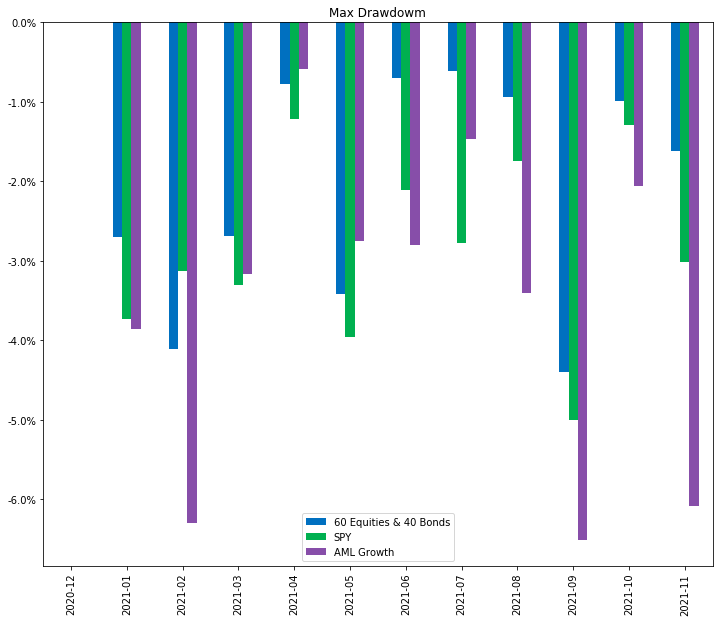

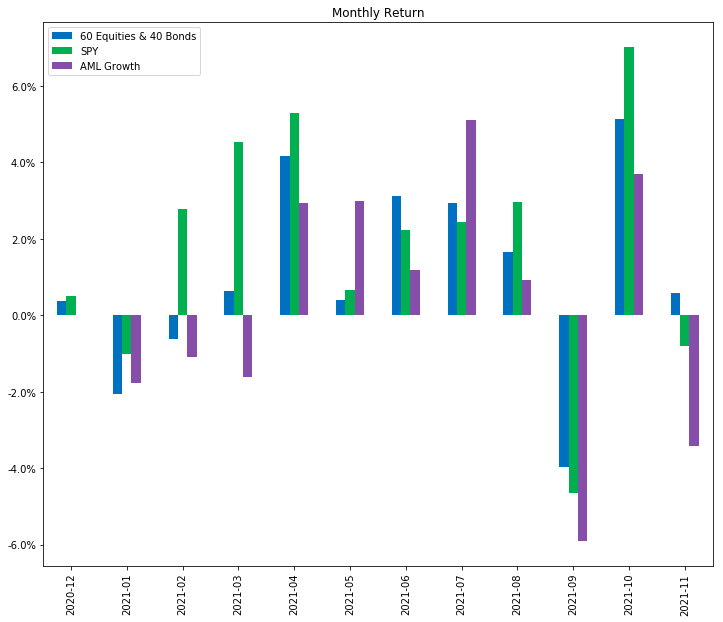

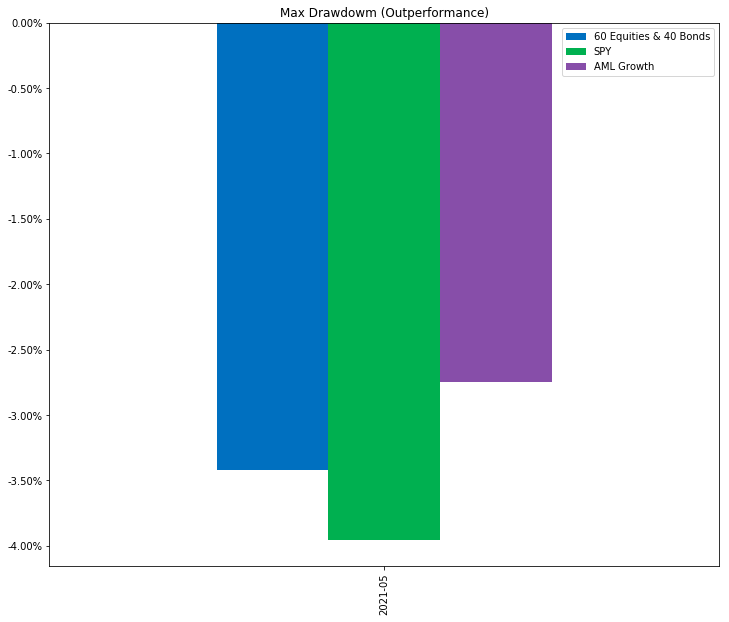

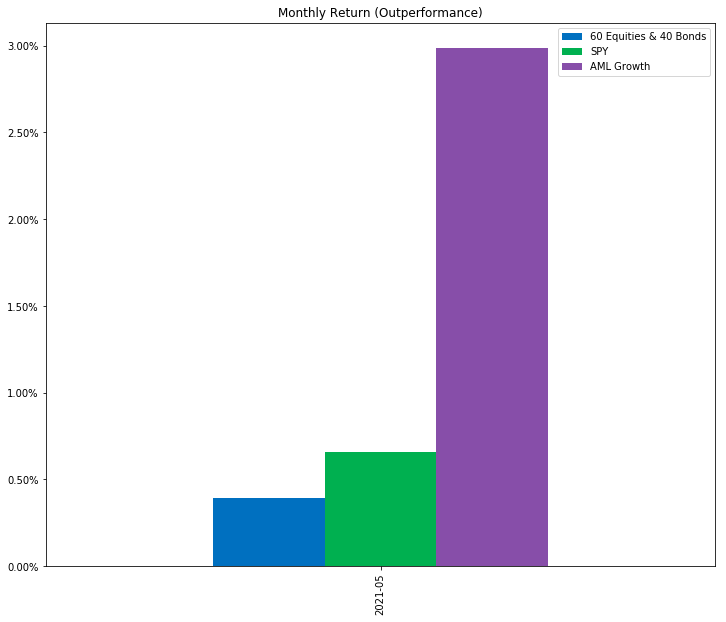

In [9]:
import matplotlib.ticker as mticker  

client = 'AML Growth'
temp = pd.concat([df[['60 Equities & 40 Bonds', 'SPY']], real[client]], axis=1).dropna()
maxddframe, retframe = performance(temp)
maxdd = maxddframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm')
maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ret = retframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Monthly Return')
ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

print("In this period, {} has a better performance.".format(client))
rank = ranklist(maxddframe, retframe, client=client)
rank.sort()
print(rank)
if len(rank)>0:
    maxdd = maxddframe.loc[rank].plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm (Outperformance)')
    maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
    ret = retframe.loc[rank].plot(kind='bar', figsize=(12,10), colors=colors, title='Monthly Return (Outperformance)')
    ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))


plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

#### TODO ####
#### For the monthly return, can you make it as absolute monthly return, (NOT annulised)
#### Please check the axis label with % / number appropriately

# Moderate

['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11']
In this period, AML Moderate has a better performance.
['2020-02', '2020-03', '2020-06', '2020-07', '2021-01', '2021-05', '2021-09']


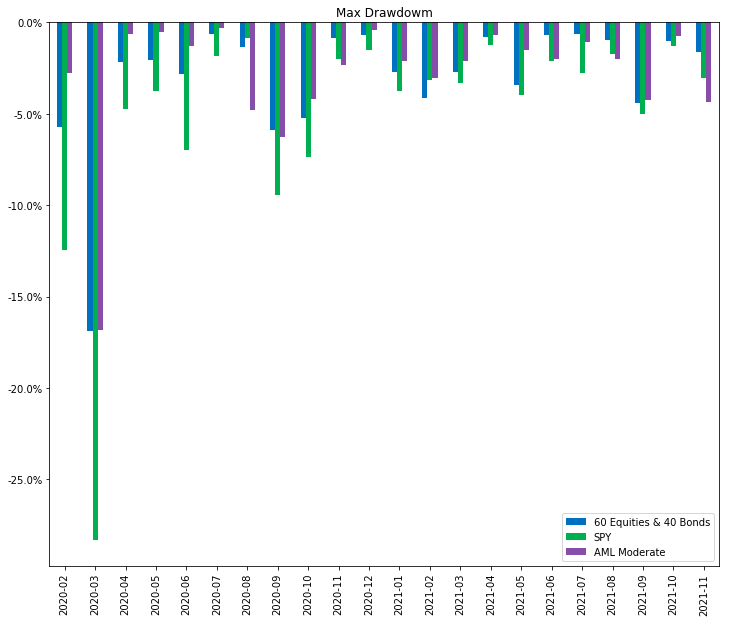

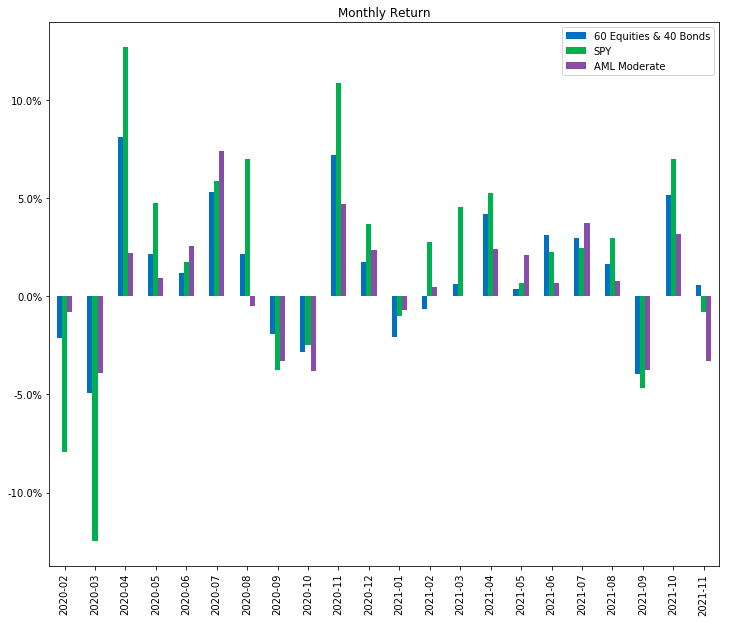

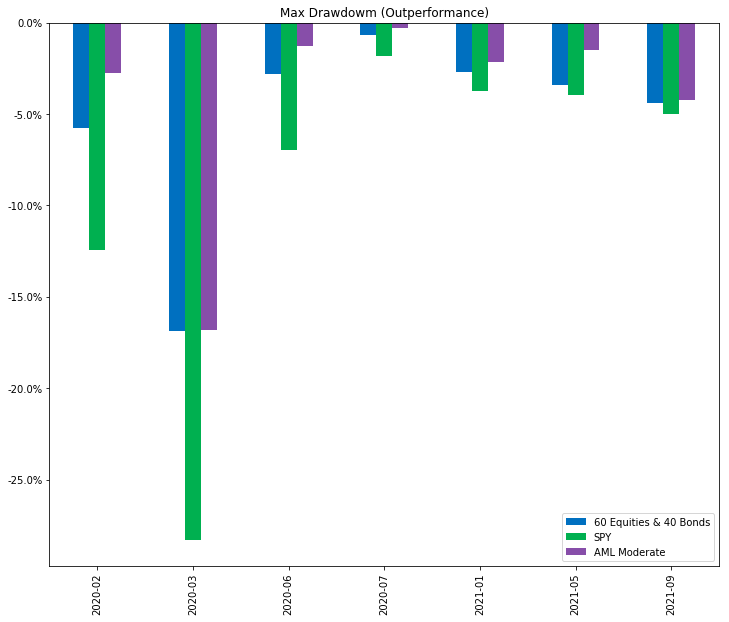

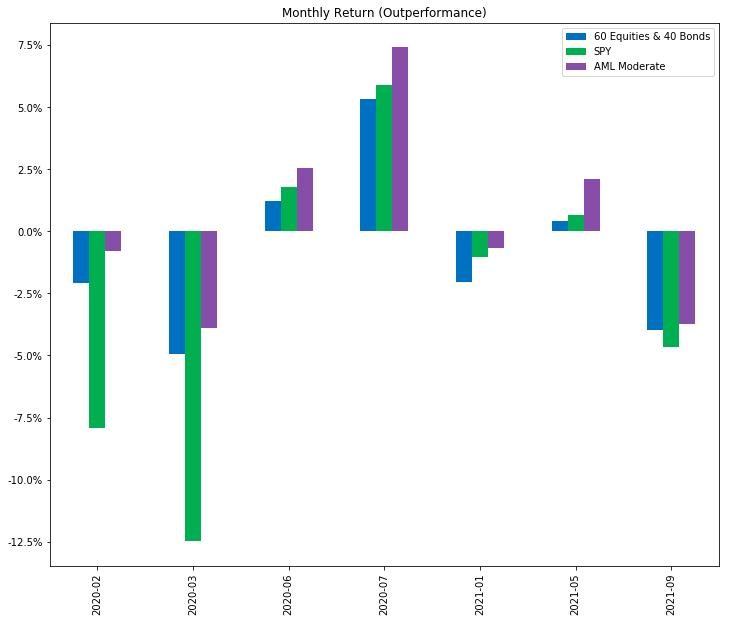

In [10]:
client = 'AML Moderate'
temp = pd.concat([df[['60 Equities & 40 Bonds', 'SPY']], real[client]], axis=1).dropna()
maxddframe, retframe = performance(temp)
maxdd = maxddframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm')
maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ret = retframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Monthly Return')
ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

print("In this period, {} has a better performance.".format(client))
rank = ranklist(maxddframe, retframe, client=client)
rank.sort()
print(rank)
if len(rank)>0:
    maxdd = maxddframe.loc[rank].plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm (Outperformance)')
    maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
    ret = retframe.loc[rank].plot(kind='bar', figsize=(12,10), colors=colors, title='Monthly Return (Outperformance)')
    ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# Conservative

['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11']
In this period, AML Conservative has a better performance.
['2020-02', '2020-03', '2020-09', '2020-10', '2021-01', '2021-05', '2021-09']


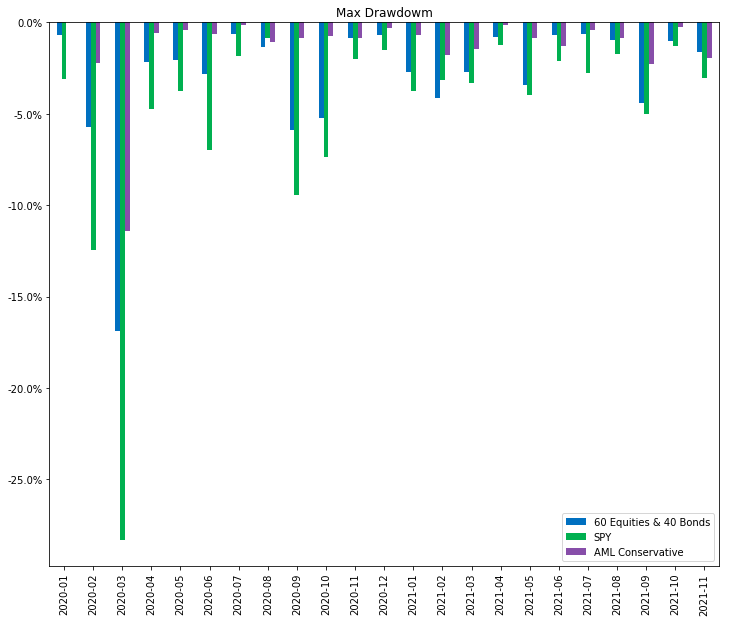

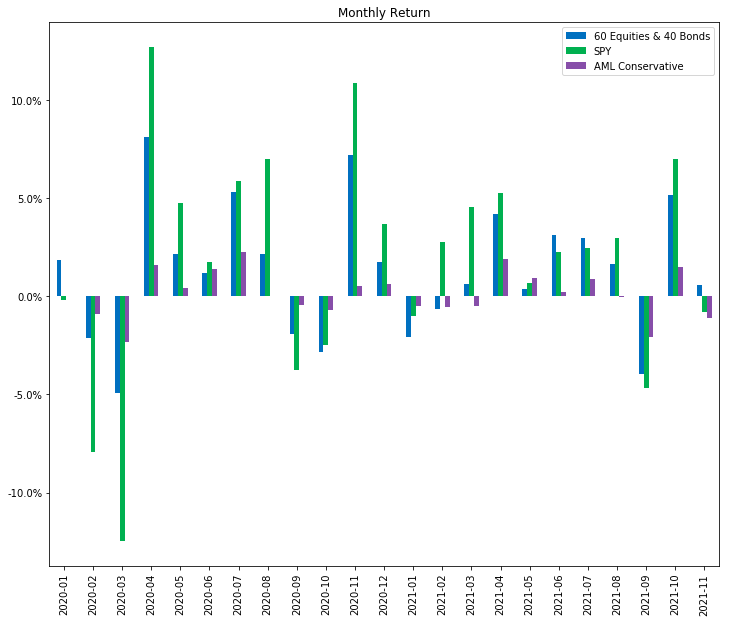

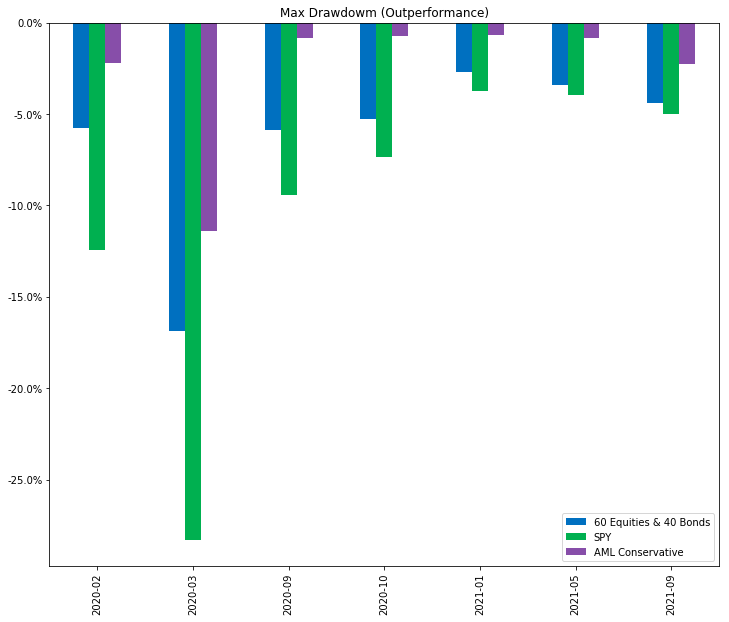

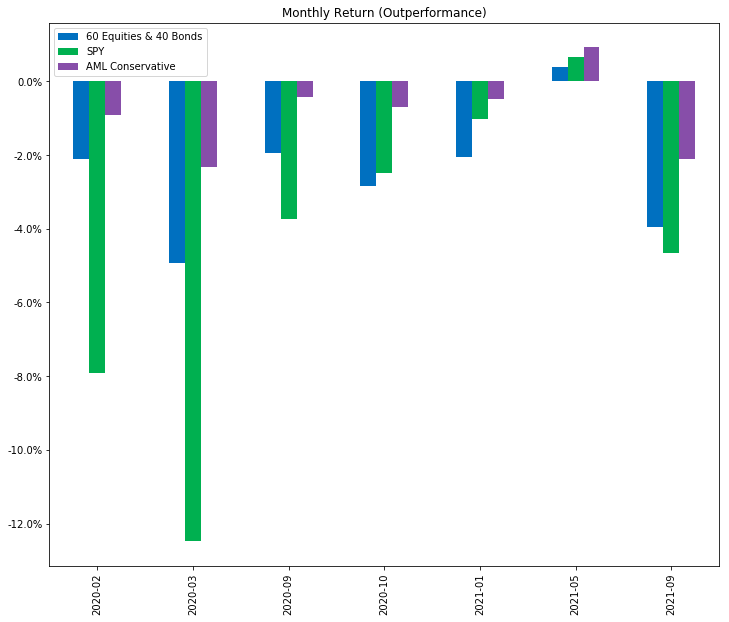

In [11]:
client = 'AML Conservative'
temp = pd.concat([df[['60 Equities & 40 Bonds', 'SPY']], real[client]], axis=1).dropna()
maxddframe, retframe = performance(temp)
maxdd = maxddframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm')
maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ret = retframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Monthly Return')
ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

print("In this period, {} has a better performance.".format(client))
rank = ranklist(maxddframe, retframe, client=client)
rank.sort()
print(rank)
if len(rank)>0:
    maxdd = maxddframe.loc[rank].plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm (Outperformance)')
    maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
    ret = retframe.loc[rank].plot(kind='bar', figsize=(12,10), colors=colors, title='Monthly Return (Outperformance)')
    ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# FI-Conservative

['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11']
In this period, AML Conservative (Fully-invested) has a better performance.
['2021-01', '2021-05', '2021-09']


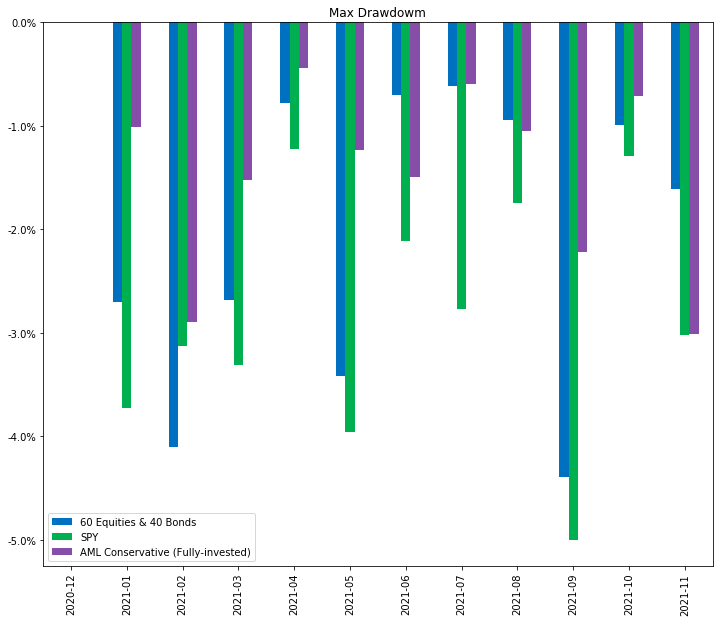

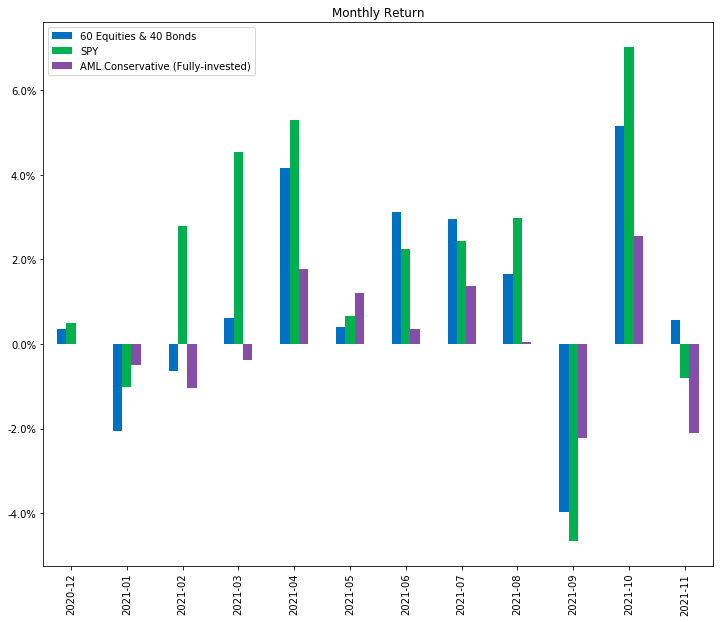

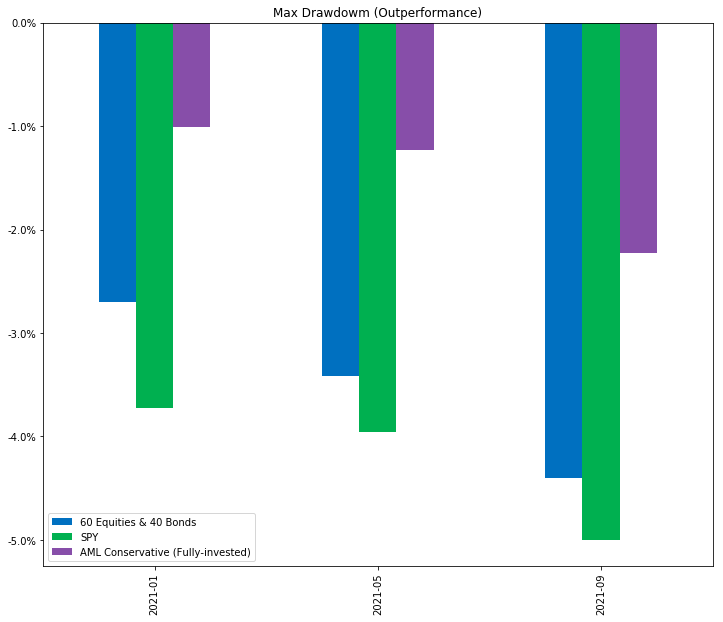

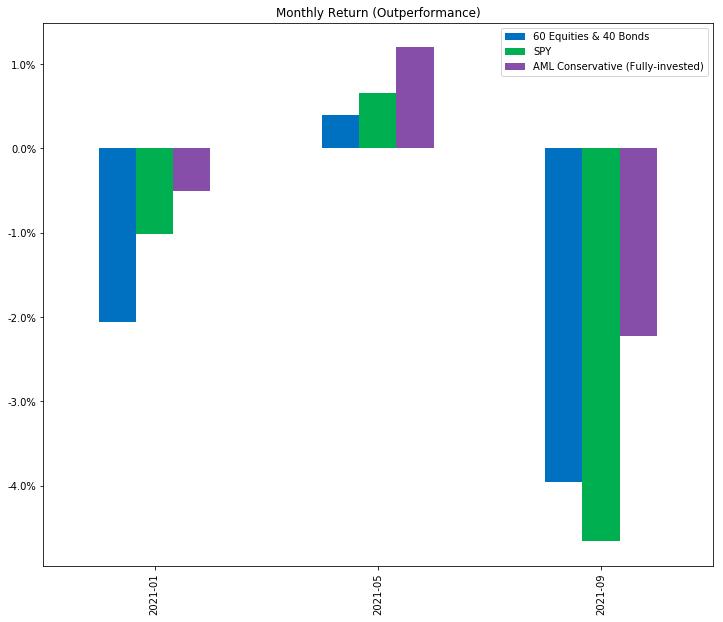

In [13]:
client = 'AML Conservative (Fully-invested)'
temp = pd.concat([df[['60 Equities & 40 Bonds', 'SPY']], real[client]], axis=1).dropna()
maxddframe, retframe = performance(temp)
maxdd = maxddframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm')
maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ret = retframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Monthly Return')
ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

print("In this period, {} has a better performance.".format(client))
rank = ranklist(maxddframe, retframe, client=client)
rank.sort()
print(rank)
if len(rank)>0:
    maxdd = maxddframe.loc[rank].plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm (Outperformance)')
    maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
    ret = retframe.loc[rank].plot(kind='bar', figsize=(12,10), colors=colors, title='Monthly Return (Outperformance)')
    ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# Comparison between portfolios annually

In [18]:
maxddframe, retframe = performance(df, period='year')

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


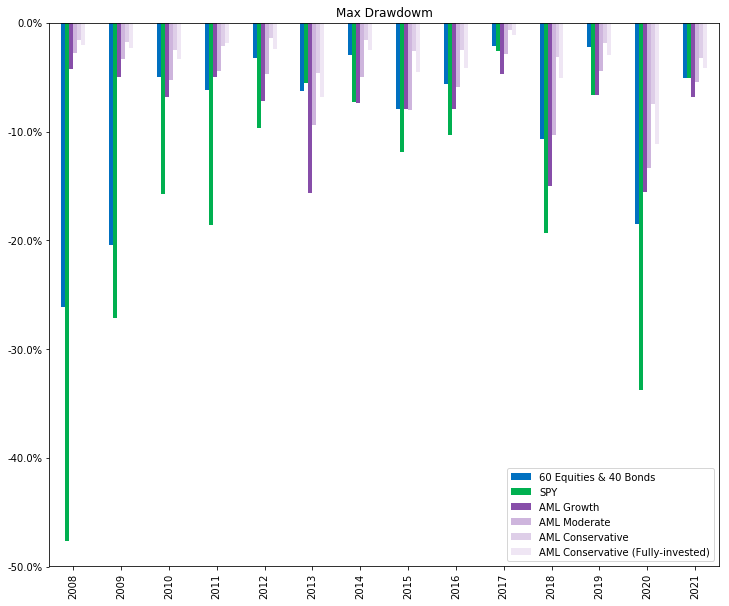

In [19]:
maxddframe = maxddframe[color_order]
maxdd = maxddframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Max Drawdowm')
maxdd.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

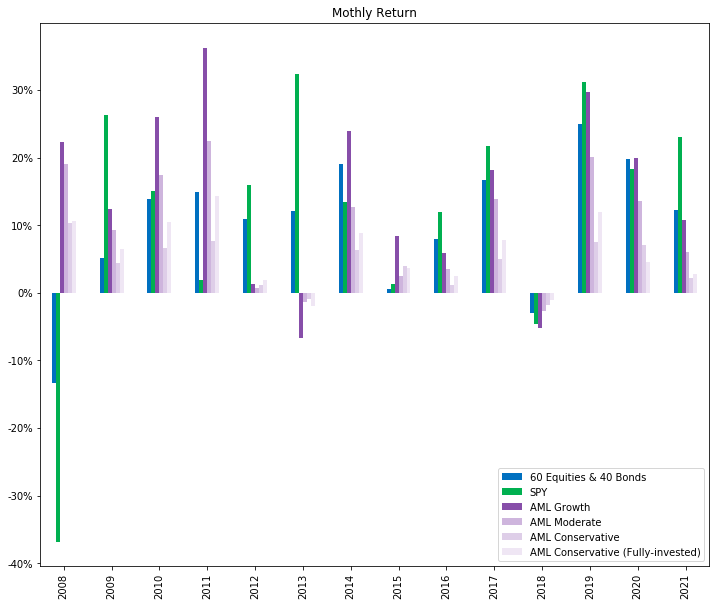

In [20]:
retframe = retframe[color_order]
ret = retframe.plot(kind='bar', figsize=(12,10), colors=colors, title='Mothly Return')
ret.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# ML BL

In [21]:
import os
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def get_record(file):
    df = pd.read_csv(file, index_col=0)
    pivot_df = pd.pivot_table(df, values='Real Prediction', index='Trading Date', columns='Symbol')
    pivot_df.index = pd.to_datetime(pivot_df.index, format='%Y-%m-%d')#.date
    return pivot_df

def get_label(dfclose, pp=21):
    dfclose.index = pd.to_datetime(dfclose.index, format='%Y-%m-%d').date
    y_pctch = -dfclose.pct_change(-pp).dropna(how='all')
    y_label = (y_pctch > 0).astype(int)
    return y_label

def get_label_from_file(file, pp=21):
    df = pd.read_csv(file)
    df = df.drop_duplicates(['date', 'code'], keep='last')
    pivot_df = pd.pivot_table(df, values='close', index='date', columns='code')
    
    ylabel = get_label(pivot_df, pp)
    return ylabel

In [28]:
price_file = 'data//data.csv'
y_df = get_label_from_file(price_file)
y_df.index = pd.to_datetime(y_df.index, format='%Y-%m-%d')
y_df.to_csv(os.path.join('data', 'y_label.csv'))

In [31]:
preds_file = 'data//trans_preds_nn21d.csv'
preds = get_record(preds_file)
preds.tail()

Symbol,DBC,EEM,EWJ,FSP,GLD,IYR,LQD,LSP,OSP,PC0,QQQ,SPY,TIP,TLT,VGK,VTI,VYM
Trading Date,,,,,,,,,,,,,,,,,
2021-09-28,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2021-09-29,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2021-10-01,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-10-04,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
accframe = pd.Series()
for asset in preds.columns:
    if asset in y_df.columns:
        tt = pd.concat([y_df[asset], preds[asset]], axis=1).dropna()
        accframe[asset] = accuracy_score(tt.iloc[:, 0], tt.iloc[:, 1]).round(2)
accframe.name = 'Accuracy'

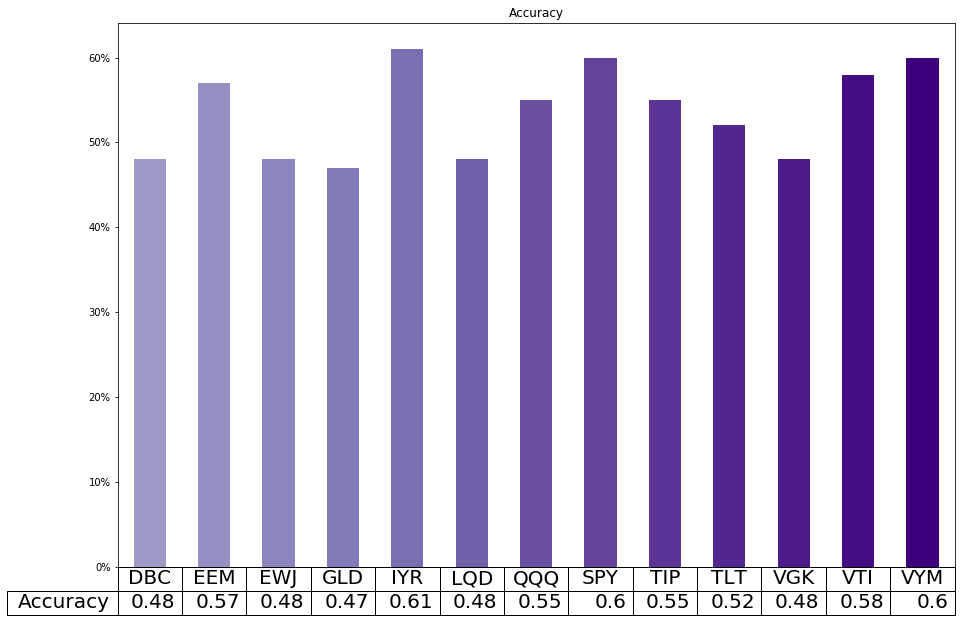

In [33]:
asset_colors = cm.Purples(np.linspace(0.5,1,len(accframe)))
acc = accframe.plot(kind='bar', figsize=(15,10), color=asset_colors, title='Accuracy', table=True)
acc.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
acc.axes.get_xaxis().set_visible(False)
# acc.axes.get_yaxis().set_visible(False)
acc.tables[0].set_fontsize(20)
acc.tables[0].scale(1,2)

# 3VOTES

In [10]:
set_year = set()
set_month = set()

yc = 2
mc = 2

excel0 = 'data/digital_twins_KPIs_sim20211116_agg.xlsx' # NO 3VOTE
excel1 = 'data/digital_twins_KPIs_sim20211116vote_agg.xlsx' # 3VOTE


In [11]:
ykpi0 = pd.read_excel(excel0, sheet_name='KPI(Annually)', index_col=0)

ys = ykpi0.sort_values('Annual Return')[:yc].index
set_year = set_year | set(ys)
#ys = ykpi0.sort_values('Annual Return')[-yc:].index
#set_year = set_year | set(ys)

ys = ykpi0.sort_values('Sharpe')[:yc].index
set_year = set_year | set(ys)
#ys = ykpi0.sort_values('Sharpe')[-yc:].index
#set_year = set_year | set(ys)

ys = ykpi0.sort_values('Max-DD')[:yc].index
set_year = set_year | set(ys)
#ys = ykpi0.sort_values('Max-DD')[-yc:].index
#set_year = set_year | set(ys)

set_year
#ykpi0

{2008, 2015, 2018}

In [12]:
ykpi1 = pd.read_excel(excel1, sheet_name='KPI(Annually)', index_col=0)

ys = ykpi1.sort_values('Annual Return')[:yc].index
set_year = set_year | set(ys)
#ys = ykpi1.sort_values('Annual Return')[-yc:].index
#set_year = set_year | set(ys)

ys = ykpi1.sort_values('Sharpe')[:yc].index
set_year = set_year | set(ys)
#ys = ykpi1.sort_values('Sharpe')[-yc:].index
#set_year = set_year | set(ys)

ys = ykpi1.sort_values('Max-DD')[:yc].index
set_year = set_year | set(ys)
#ys = ykpi1.sort_values('Max-DD')[-yc:].index
#set_year = set_year | set(ys)

set_year
#ykpi1

{2008, 2013, 2015, 2018, 2020}

In [13]:
#ys = (ykpi1-ykpi0).sort_values('Annual Return')[:yc].index
#set_year = set_year | set(ys)
ys = (ykpi1-ykpi0).sort_values('Annual Return')[-yc:].index
set_year = set_year | set(ys)

#ys = (ykpi1-ykpi0).sort_values('Sharpe')[:yc].index
#set_year = set_year | set(ys)
ys = (ykpi1-ykpi0).sort_values('Sharpe')[-yc:].index
set_year = set_year | set(ys)

#ys = (ykpi1-ykpi0).sort_values('Max-DD')[:yc].index
#set_year = set_year | set(ys)
ys = (ykpi1-ykpi0).sort_values('Max-DD')[-yc:].index
set_year = set_year | set(ys)

set_year
#ykpi1

{2008, 2009, 2013, 2015, 2018, 2020}

In [14]:
list_year = list(set_year)
list_year.sort()

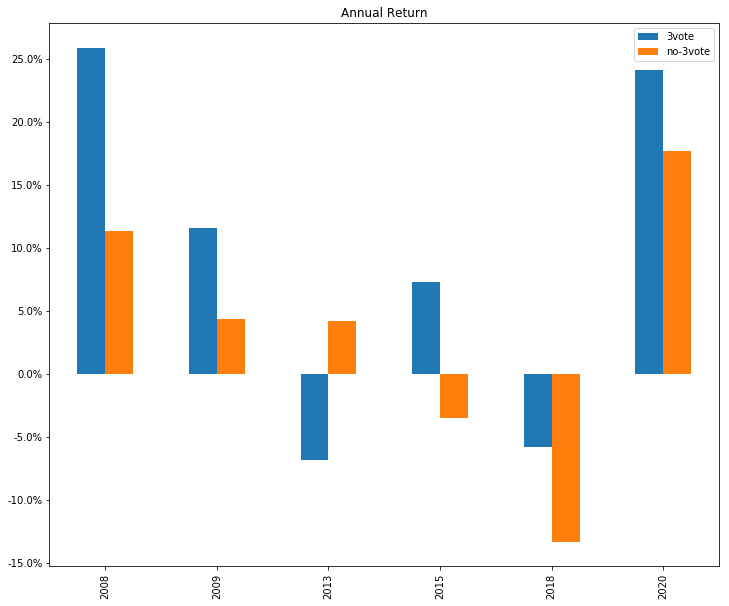

In [15]:
df = pd.concat([ykpi1['Annual Return'], ykpi0['Annual Return']], 1, keys=['3vote','no-3vote']).loc[list_year]
chart = df.plot.bar(title='Annual Return', figsize=(12,10))
chart.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

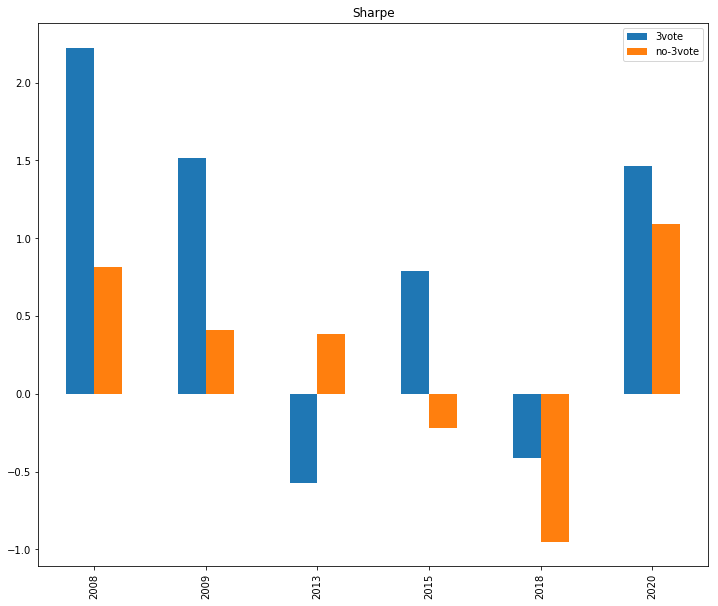

In [16]:
df = pd.concat([ykpi1['Sharpe'], ykpi0['Sharpe']], 1, keys=['3vote','no-3vote']).loc[list_year]
chart = df.plot.bar(title='Sharpe', figsize=(12,10))

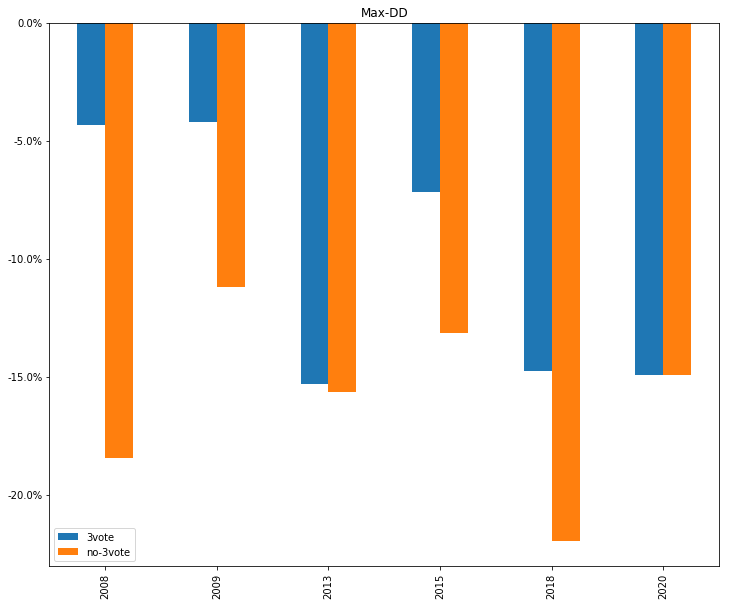

In [17]:
df = pd.concat([ykpi1['Max-DD'], ykpi0['Max-DD']], 1, keys=['3vote','no-3vote']).loc[list_year]
chart = df.plot.bar(title='Max-DD', figsize=(12,10))
chart.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

In [18]:
mkpi0 = pd.read_excel(excel0, sheet_name='KPI(Monthly)', index_col=0)

ms = mkpi0.sort_values('Annual Return')[:mc].index
set_month = set_month | set(ms)
#ms = mkpi0.sort_values('Annual Return')[-mc:].index
#set_month = set_month | set(ms)

ms = mkpi0.sort_values('Sharpe')[:mc].index
set_month = set_month | set(ms)
#ms = mkpi0.sort_values('Sharpe')[-mc:].index
#set_month = set_month | set(ms)

ms = mkpi0.sort_values('Max-DD')[:mc].index
set_month = set_month | set(ms)
#ms = mkpi0.sort_values('Max-DD')[-mc:].index
#set_month = set_month | set(ms)

set_month
#mkpi0

{'2009-01', '2013-05', '2018-02', '2018-10', '2020-03'}

In [19]:
mkpi1 = pd.read_excel(excel1, sheet_name='KPI(Monthly)', index_col=0)

ms = mkpi1.sort_values('Annual Return')[:mc].index
set_month = set_month | set(ms)
#ms = mkpi1.sort_values('Annual Return')[-mc:].index
#set_month = set_month | set(ms)

ms = mkpi1.sort_values('Sharpe')[:mc].index
set_month = set_month | set(ms)
#ms = mkpi1.sort_values('Sharpe')[-mc:].index
#set_month = set_month | set(ms)

ms = mkpi1.sort_values('Max-DD')[:mc].index
set_month = set_month | set(ms)
#ms = mkpi1.sort_values('Max-DD')[-mc:].index
#set_month = set_month | set(ms)

set_month
#mkpi1

{'2009-01', '2009-04', '2013-05', '2018-02', '2018-10', '2020-03'}

In [20]:
#ms = (mkpi1-mkpi0).sort_values('Annual Return')[:mc].index
#set_month = set_month | set(ms)
ms = (mkpi1-mkpi0).sort_values('Annual Return')[-mc:].index
set_month = set_month | set(ms)

#ms = (mkpi1-mkpi0).sort_values('Sharpe')[:mc].index
#set_month = set_month | set(ms)
ms = (mkpi1-mkpi0).sort_values('Sharpe')[-mc:].index
set_month = set_month | set(ms)

#ms = (mkpi1-mkpi0).sort_values('Max-DD')[:mc].index
#set_month = set_month | set(ms)
ms = (mkpi1-mkpi0).sort_values('Max-DD')[-mc:].index
set_month = set_month | set(ms)

set_month

{'2008-10',
 '2009-01',
 '2009-04',
 '2013-05',
 '2017-02',
 '2018-02',
 '2018-10',
 '2018-12',
 '2020-02',
 '2020-03'}

In [21]:
list_month = list(set_month)
list_month.sort()

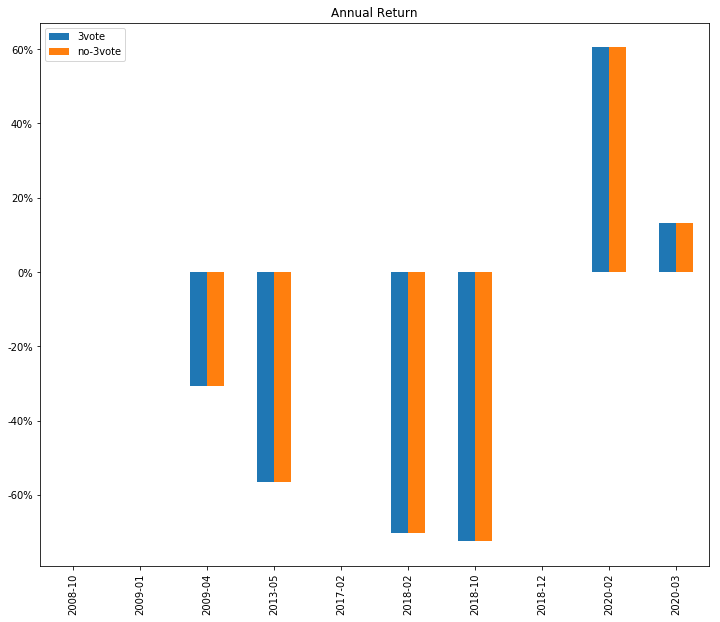

In [22]:
df = pd.concat([mkpi1['Annual Return'], mkpi0['Annual Return']], 1, keys=['3vote','no-3vote']).loc[list_month]
chart = df.plot.bar(title='Annual Return', figsize=(12,10))
chart.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

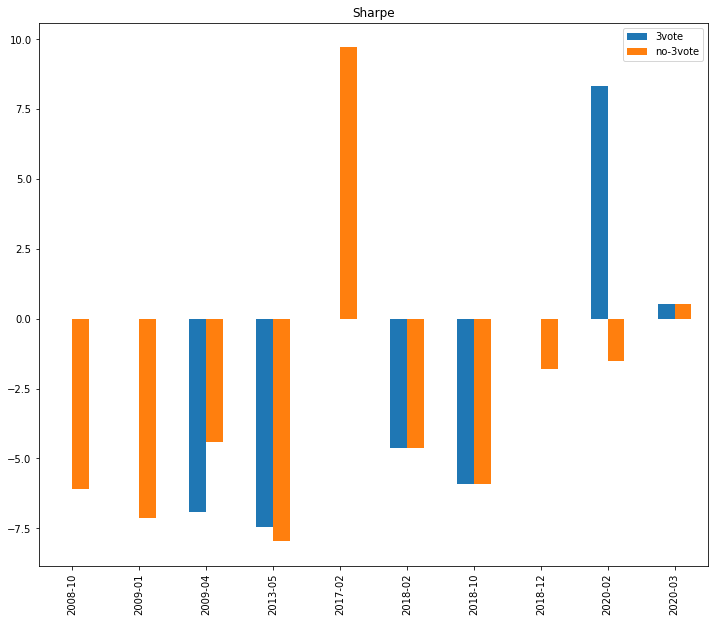

In [23]:
df = pd.concat([mkpi1['Sharpe'], mkpi0['Sharpe']], 1, keys=['3vote','no-3vote']).loc[list_month]
df.plot.bar(title='Sharpe', figsize=(12,10))

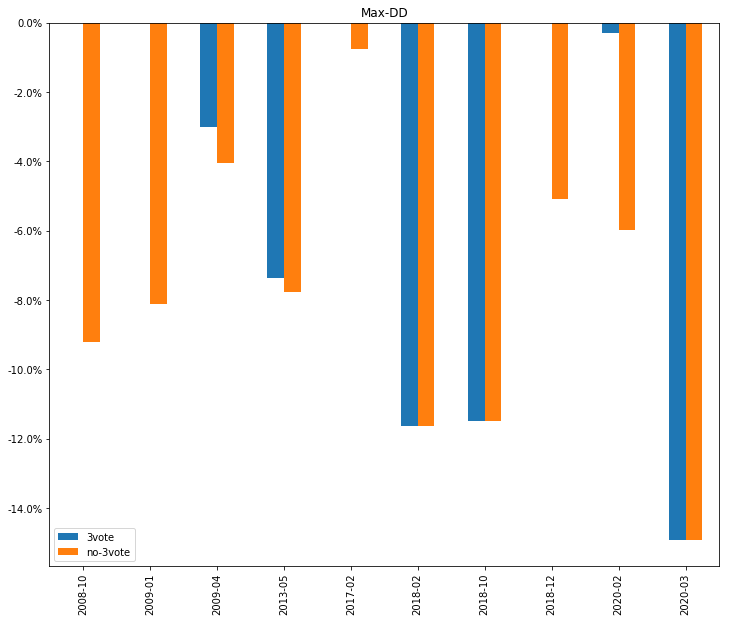

In [24]:
df = pd.concat([mkpi1['Max-DD'], mkpi0['Max-DD']], 1, keys=['3vote','no-3vote']).loc[list_month]
chart = df.plot.bar(title='Max-DD', figsize=(12,10))
chart.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

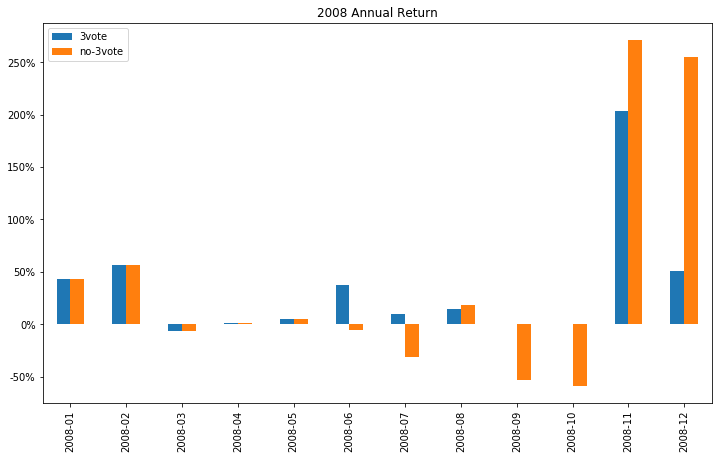

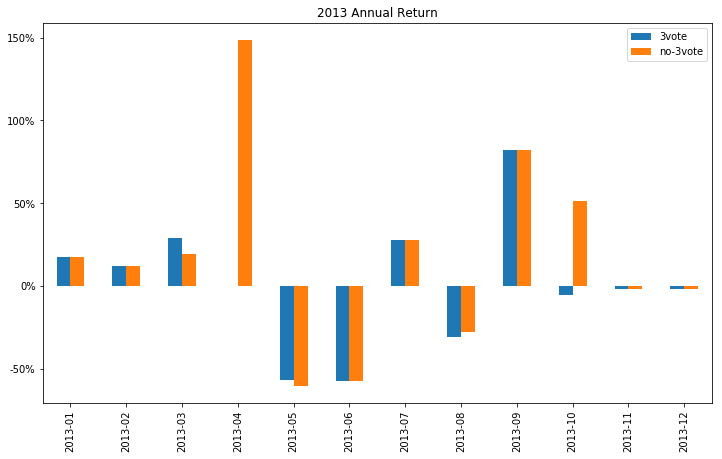

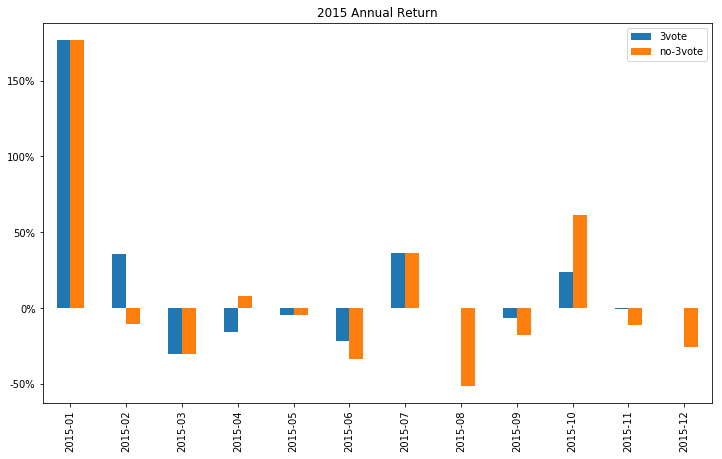

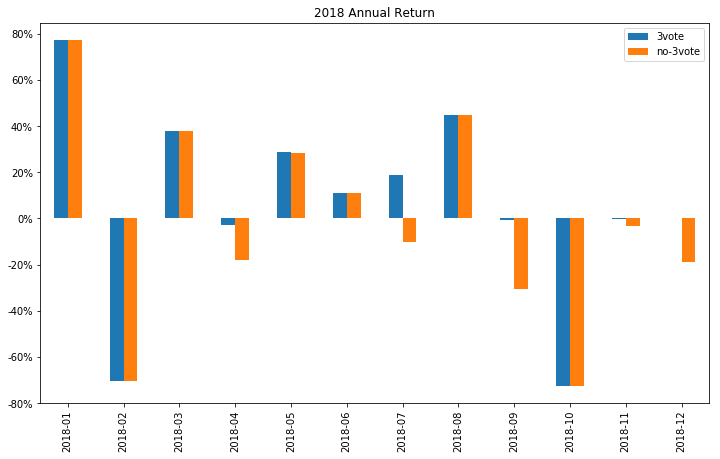

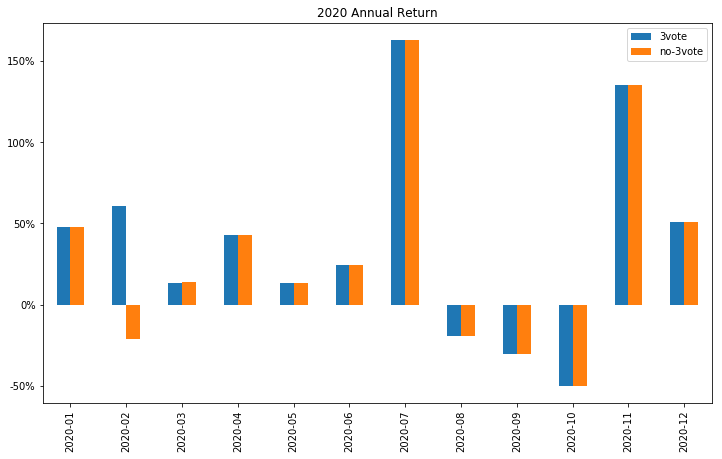

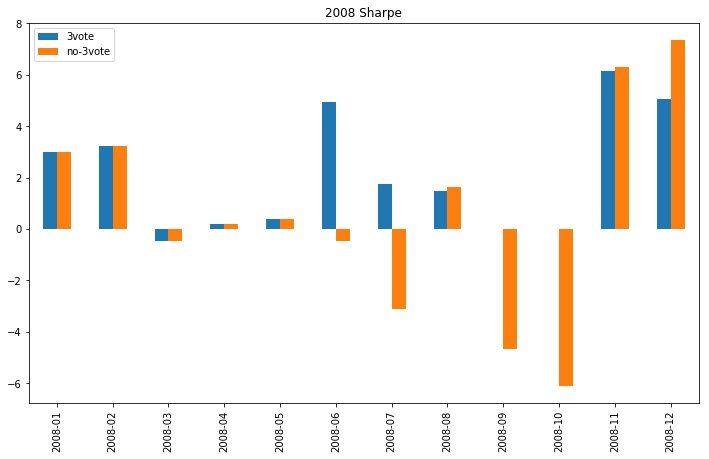

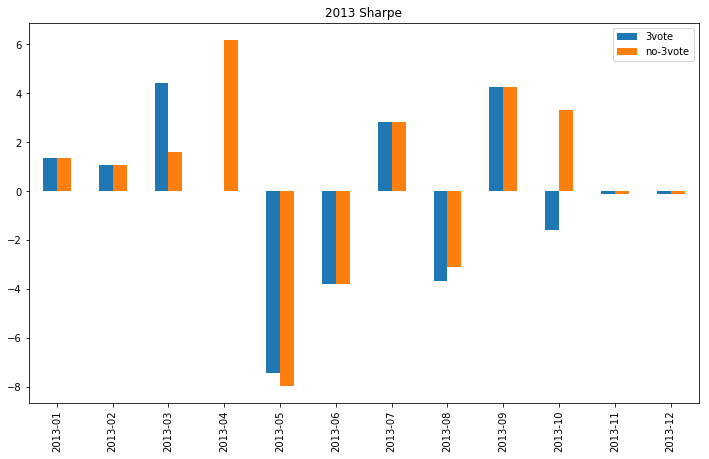

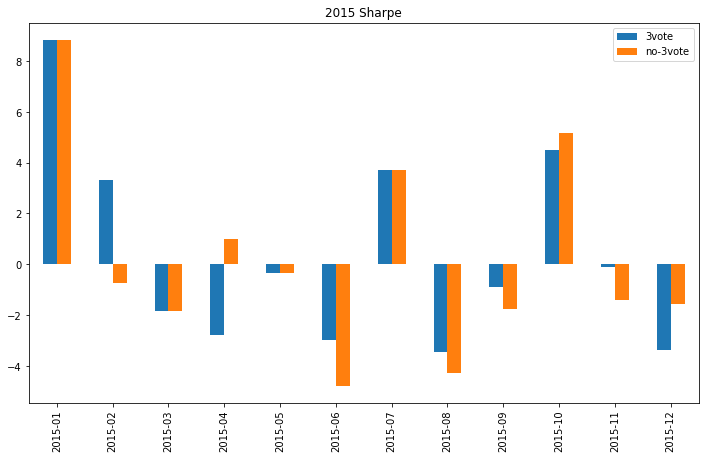

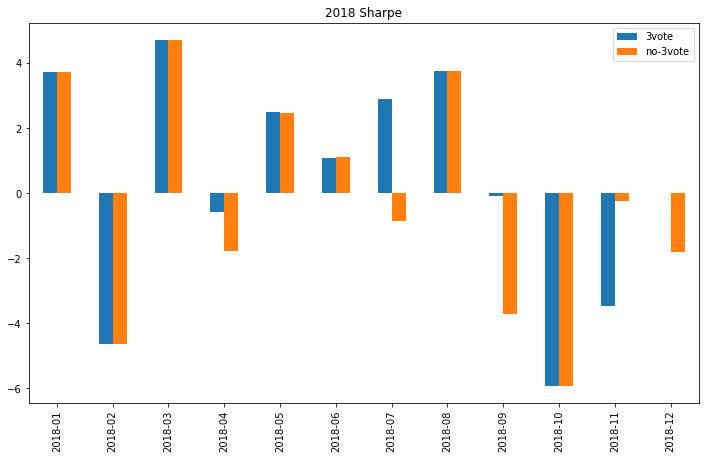

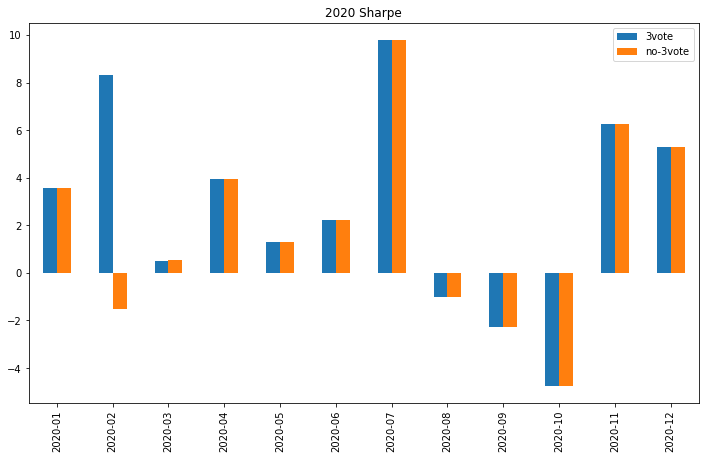

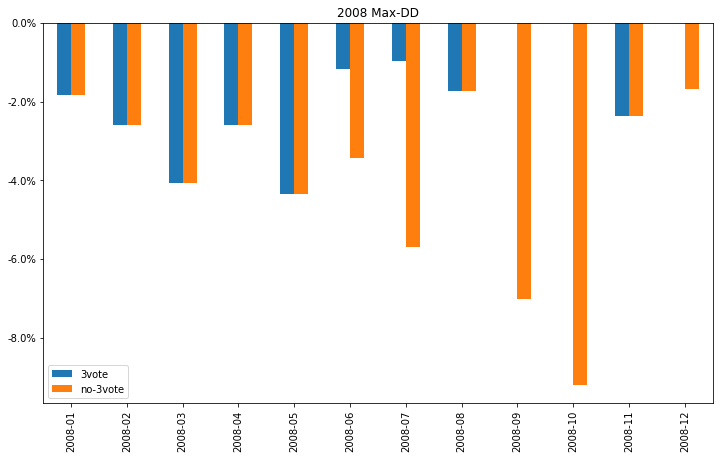

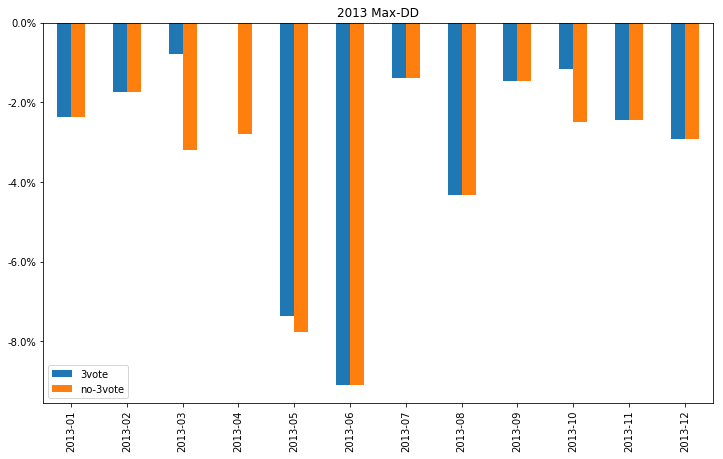

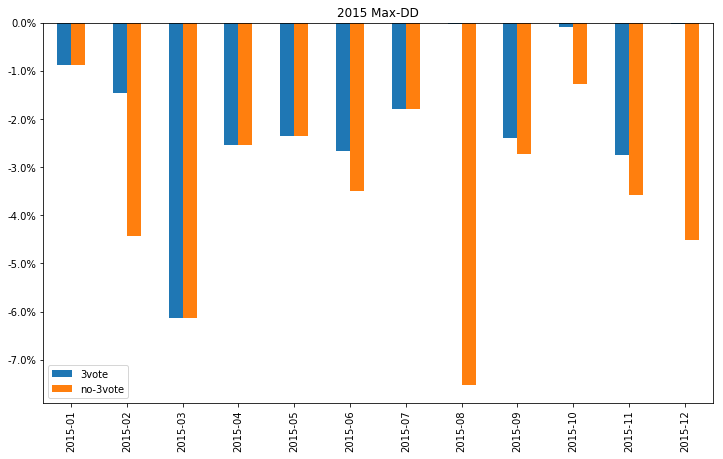

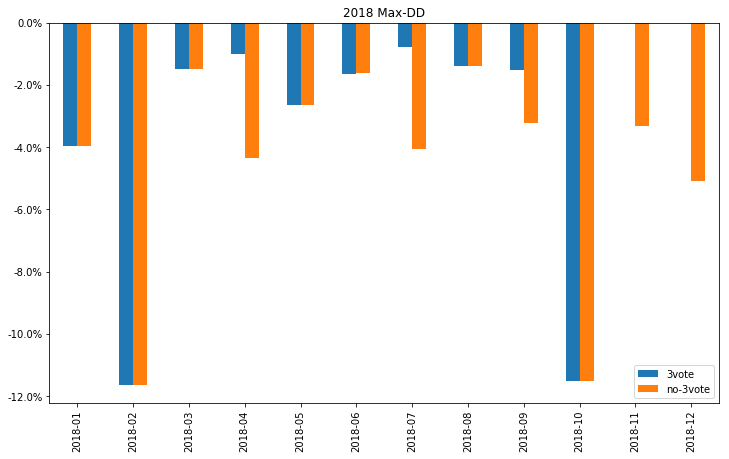

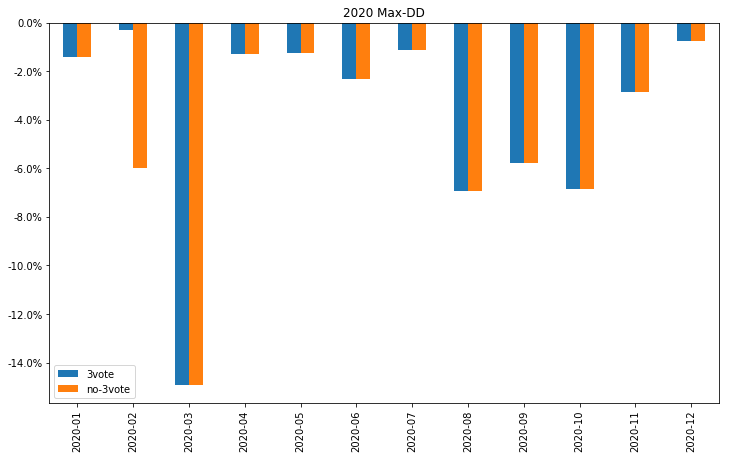

In [25]:
for k in ['Annual Return', 'Sharpe', 'Max-DD']:
    for y in ['2008','2013','2015','2018','2020']:
        yms = [ym for ym in mkpi0.index if ym.startswith(y)]
        df = pd.concat([mkpi1[k], mkpi0[k]], 1, keys=['3vote','no-3vote']).loc[yms]
        if k != 'Sharpe':
            chart = df.plot.bar(title=y+' '+k, figsize=(12,7))
            chart.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
        else:
            df.plot.bar(title=y+' '+k, figsize=(12,7))

In [26]:
dkpi0 = pd.read_excel(excel0, sheet_name='KPI(Daily)', index_col=0)
ret0 = dkpi0['Daily Return']
ret0

2008-01-02    0.020657
2008-01-03    0.004444
2008-01-04   -0.008681
2008-01-07   -0.003747
2008-01-08    0.002382
2008-01-09    0.000042
2008-01-10   -0.004684
2008-01-11    0.006058
2008-01-14    0.010051
2008-01-15   -0.005314
2008-01-16   -0.012154
2008-01-17   -0.000434
2008-01-18   -0.000419
2008-01-22    0.005162
2008-01-23   -0.003668
2008-01-24   -0.000099
2008-01-25    0.014576
2008-01-28    0.004502
2008-01-29   -0.000688
2008-01-30   -0.005231
2008-01-31    0.007696
2008-02-01   -0.004158
2008-02-04   -0.005850
2008-02-05   -0.001109
2008-02-06   -0.001029
2008-02-07   -0.011333
2008-02-08    0.019214
2008-02-11    0.005447
2008-02-12   -0.012053
2008-02-13   -0.008258
                ...   
2021-08-19    0.001496
2021-08-20    0.002369
2021-08-23    0.020616
2021-08-24    0.000244
2021-08-25   -0.002050
2021-08-26   -0.005880
2021-08-27    0.023276
2021-08-30    0.005229
2021-08-31   -0.007932
2021-09-01    0.003318
2021-09-02    0.005334
2021-09-03   -0.001656
2021-09-07 

In [27]:
dkpi1 = pd.read_excel(excel1, sheet_name='KPI(Daily)', index_col=0)
ret1 = dkpi1['Daily Return']
ret1

2008-01-02    0.020657
2008-01-03    0.004444
2008-01-04   -0.008681
2008-01-07   -0.003747
2008-01-08    0.002382
2008-01-09    0.000042
2008-01-10   -0.004684
2008-01-11    0.006058
2008-01-14    0.010051
2008-01-15   -0.005314
2008-01-16   -0.012154
2008-01-17   -0.000434
2008-01-18   -0.000419
2008-01-22    0.005162
2008-01-23   -0.003668
2008-01-24   -0.000099
2008-01-25    0.014576
2008-01-28    0.004502
2008-01-29   -0.000688
2008-01-30   -0.005231
2008-01-31    0.007696
2008-02-01   -0.004158
2008-02-04   -0.005850
2008-02-05   -0.001109
2008-02-06   -0.001029
2008-02-07   -0.011333
2008-02-08    0.019214
2008-02-11    0.005447
2008-02-12   -0.012053
2008-02-13   -0.008258
                ...   
2021-08-19    0.001496
2021-08-20    0.002369
2021-08-23    0.020616
2021-08-24    0.000244
2021-08-25   -0.002050
2021-08-26   -0.005880
2021-08-27    0.023276
2021-08-30    0.005229
2021-08-31   -0.007932
2021-09-01    0.003318
2021-09-02    0.005334
2021-09-03   -0.001656
2021-09-07 

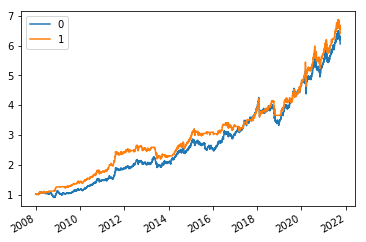

In [28]:
ret = pd.concat([ret0, ret1],1,keys=[0,1])
(1+ret).cumprod().plot()

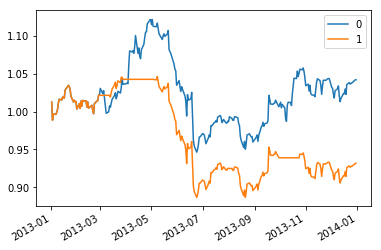

In [29]:
(1+ret['2013']).cumprod().plot()

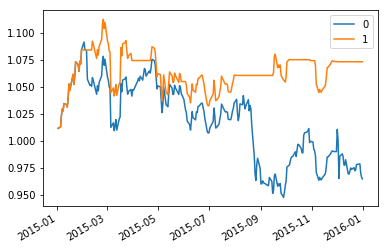

In [30]:
(1+ret['2015']).cumprod().plot()

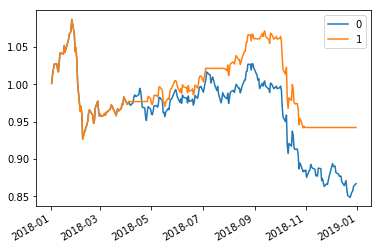

In [31]:
(1+ret['2018']).cumprod().plot()

In [60]:
# Vis_pred_3vote